learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system

In [2]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code

In [4]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 1.5,
          random_state=42)

In [9]:
trainlen = 1000
future = 1000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

In [10]:
prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

test error: 
0.13847380276932683


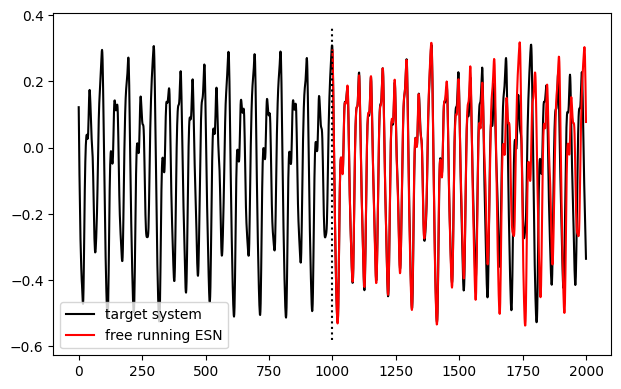

In [13]:
plt.figure(figsize=(7.2,4.45))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend()
plt.savefig('mg.pgf',bbox_inches='tight')
